# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

3 4 5
56 77 3
[+] Result: ( 53.28571429  -38.71428571)


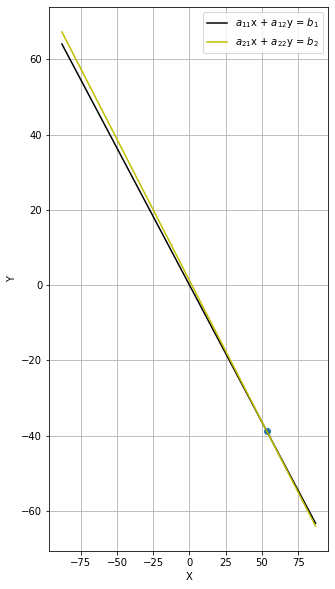

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

is_solve_exist_flag = False

input_arr_1 = [int(i) for i in input().split()]
input_arr_2 = [int(i) for i in input().split()]

a1, b1 = input_arr_1[:2], input_arr_1[2:]
a2, b2 = input_arr_2[:2], input_arr_2[2:]

a = np.array([a1, a2])
b = np.array([b1, b2])
det = np.linalg.det(a)

if det == 0:
    if (a1[0] / a2[0]) == (a1[1] / a2[1]) == (b1[0]/b2[0]):
        print("[!] Infinite number of solutions")
        x = list(range(-10, 10))
    else:
        print("[!] No solution")
        x = list(range(-10, 10))
else:
    solve = np.dot(np.linalg.inv(a),b)
    print("[+] Result: (" + str(solve).replace("\n", " ").replace("[", "").replace("]", "") + ")")
    is_solve_exist_flag = True
 
    left_limit  = (solve - 50).astype(int)[1][0]
    right_limit = -(left_limit)
    x = list(range(left_limit, right_limit))

y1 = [(input_arr_1[2]- x1*input_arr_1[0])/input_arr_1[1] for x1 in x] 
y2 = [(input_arr_2[2]- x2*input_arr_2[0])/input_arr_2[1] for x2 in x]

fig, ax = plt.subplots(figsize=(5, 10)) 

ax.plot(x, y2, 'k') 
ax.plot(x, y1, 'y') 
ax.set_xlabel("X") 
ax.set_ylabel("Y") 
ax.grid(True)
plt.legend(["$a_{11}$x + $a_{12}$y = $b_{1}$", "$a_{21}$x + $a_{22}$y = $b_{2}$"])
if is_solve_exist_flag:
  ax.scatter(solve[0], solve[1])

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

The result is: 



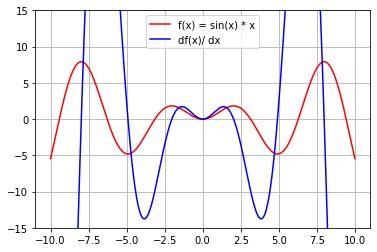

In [ ]:
import torch
from matplotlib import pyplot as plt

x = torch.linspace(-10, 10, 400, requires_grad=True)
y = torch.sin(x) * x
y.backward(x)

fig, ax = plt.subplots()
ax.set_ylim((-15, 15))
print("The result is: \n")
plt.plot(x.detach().numpy(), y.detach().numpy(), c = 'red')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), c = 'blue')
plt.legend(["f(x) = sin(x) * x", "df(x)/ dx"])
ax.grid(True)
